In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
Credit_card_data = pd.read_csv('BankChurners.csv')

In [34]:
Credit_card_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [35]:
# checking count the number of unique values in each column of the data
Credit_card_data.nunique()

CLIENTNUM                                                                                                                             10127
Attrition_Flag                                                                                                                            2
Customer_Age                                                                                                                             45
Gender                                                                                                                                    2
Dependent_count                                                                                                                           6
Education_Level                                                                                                                           7
Marital_Status                                                                                                                            4
Income_Category     

In [36]:
# checking for duplicated values
Credit_card_data.duplicated().sum()

0

In [37]:
# Dropping columns with unusual names
Credit_card_data.drop([ 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2','CLIENTNUM'], axis=1, inplace=True)

In [38]:
Credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [39]:
Credit_card_data.shape

(10127, 20)

In [40]:
# Define dictionaries for mapping
mapping_dicts = {
    'Attrition_Flag': {'Existing Customer': 0, 'Attrited Customer': 1},
    'Education_Level': {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Post-Graduate': 4, 'Graduate': 5, 'Doctorate': 6},
    'Income_Category': {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5},
    'Card_Category': {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}
}

# Apply the mappings using a loop
for col, mapping_dict in mapping_dicts.items():
    Credit_card_data[col] = Credit_card_data[col].map(mapping_dict)

In [41]:
# Working with Nominal Features with pandas `get_dummies` function.
Credit_card_data = pd.get_dummies(Credit_card_data, columns=['Gender', 'Marital_Status'])

encoded = list(Credit_card_data.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

24 total features after one-hot encoding.


In [42]:
Credit_card_data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Education_Level,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown
0,0,45,3,2,3,0,39,5,1,3,...,1144,42,1.625,0.061,0,1,0,1,0,0
1,0,49,5,5,1,0,44,6,1,2,...,1291,33,3.714,0.105,1,0,0,0,1,0
2,0,51,3,5,4,0,36,4,1,0,...,1887,20,2.333,0.000,0,1,0,1,0,0
3,0,40,4,2,1,0,34,3,4,1,...,1171,20,2.333,0.760,1,0,0,0,0,1
4,0,40,3,1,3,0,21,5,1,0,...,816,28,2.500,0.000,0,1,0,1,0,0


In [43]:
Credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  int64  
 4   Income_Category           10127 non-null  int64  
 5   Card_Category             10127 non-null  int64  
 6   Months_on_book            10127 non-null  int64  
 7   Total_Relationship_Count  10127 non-null  int64  
 8   Months_Inactive_12_mon    10127 non-null  int64  
 9   Contacts_Count_12_mon     10127 non-null  int64  
 10  Credit_Limit              10127 non-null  float64
 11  Total_Revolving_Bal       10127 non-null  int64  
 12  Avg_Open_To_Buy           10127 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

In [44]:
Credit_card_data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

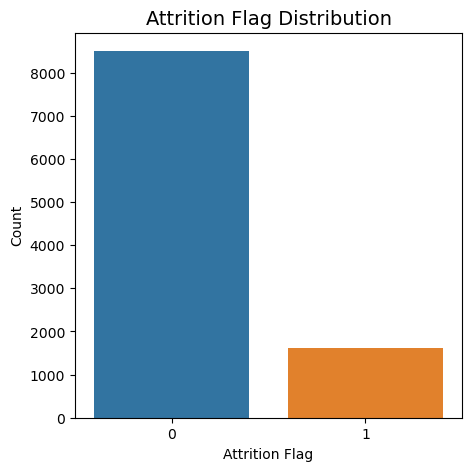

In [45]:
# Create a bar plot for attrition flag
attrition_counts=Credit_card_data['Attrition_Flag'].value_counts()
plt.figure(figsize=(5, 5))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values)
plt.title('Attrition Flag Distribution', fontsize=14)
plt.xlabel('Attrition Flag')
plt.ylabel('Count')
plt.show()

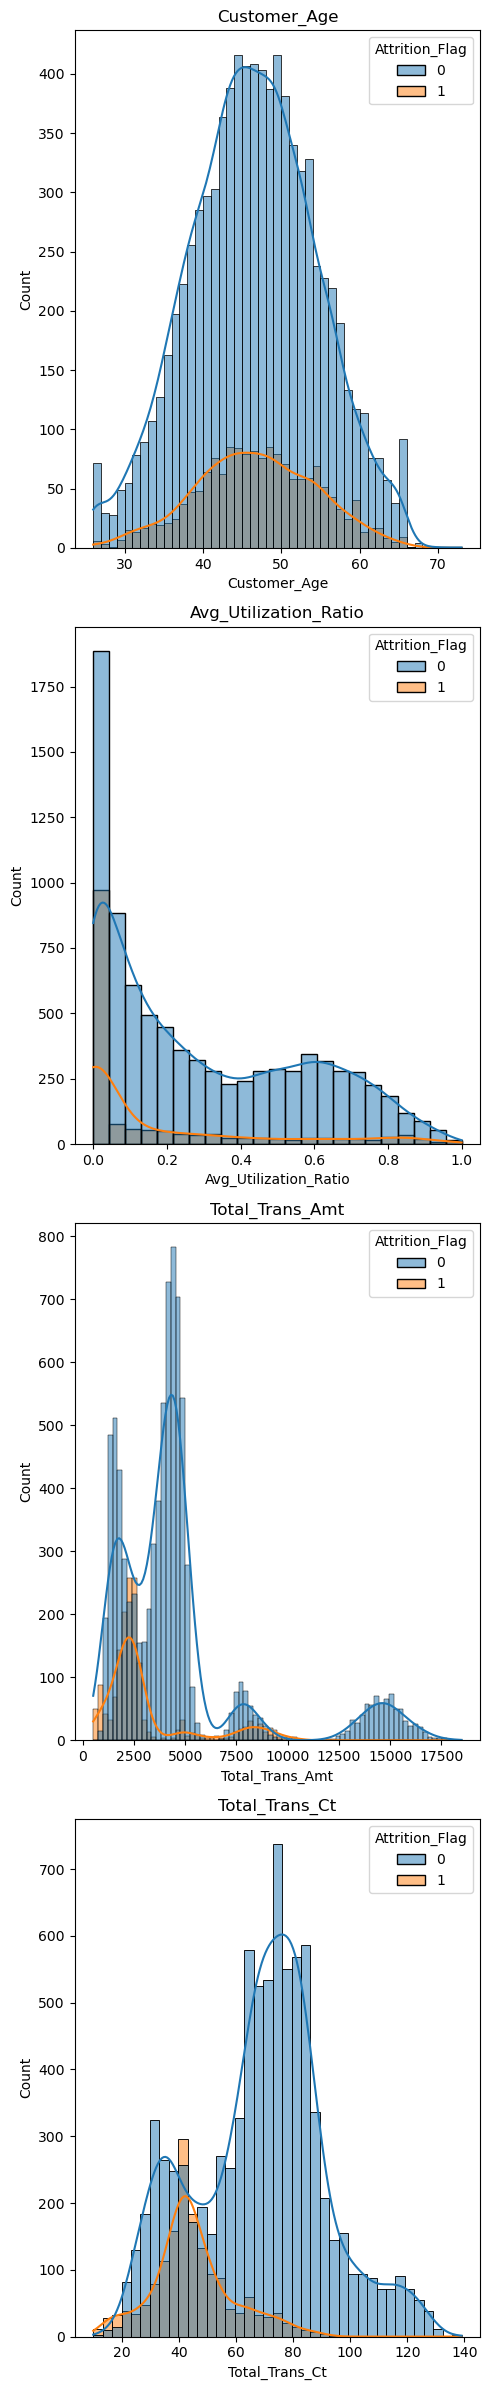

In [46]:
#creating plots for numerical data
columns_to_plot = ['Customer_Age', 'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Trans_Ct']
fig, axs = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(5, 6 * len(columns_to_plot)))

# Iterate through the columns of the dataset and create plots
for i, column in enumerate(columns_to_plot):
    # Plot for the current column
    sns.histplot(data=Credit_card_data, x=column, hue='Attrition_Flag', kde=True, ax=axs[i])
    axs[i].set_title(column)

# Adjust layout if necessary
plt.tight_layout()

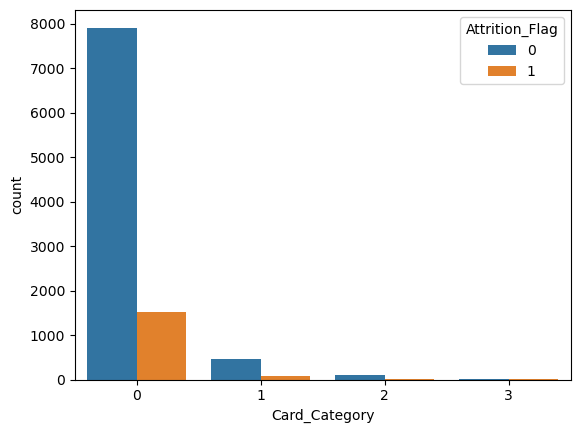

In [47]:
sns.countplot(x='Card_Category',data = Credit_card_data, hue='Attrition_Flag')
plt.show()

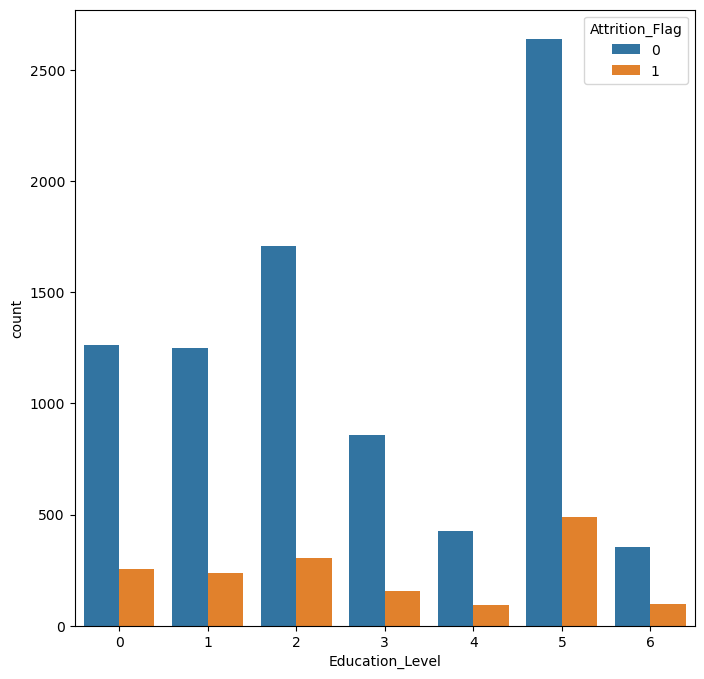

In [48]:
plt.figure(figsize=[8,8])
sns.countplot(x='Education_Level',data = Credit_card_data, hue='Attrition_Flag')
plt.show()

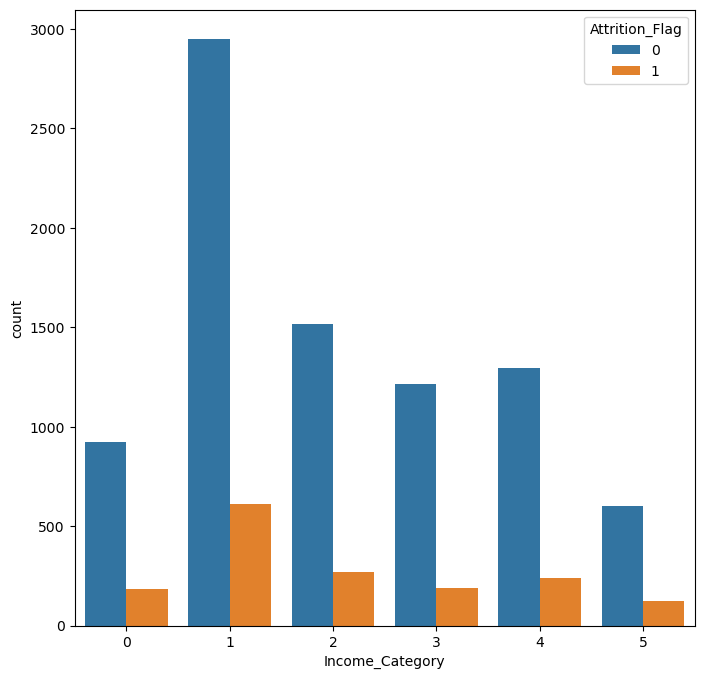

In [49]:
plt.figure(figsize=[8,8])
sns.countplot(x='Income_Category',data = Credit_card_data, hue='Attrition_Flag')
plt.show()

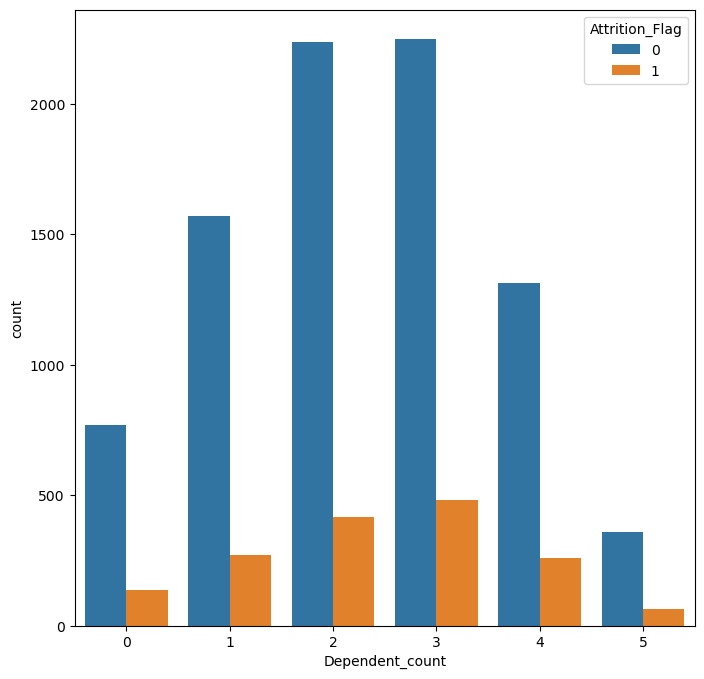

In [50]:
plt.figure(figsize=[8,8])
sns.countplot(x='Dependent_count',data = Credit_card_data, hue='Attrition_Flag')
plt.show()

In [16]:
# First we extract the x Featues and y Label
X = Credit_card_data.drop(['Attrition_Flag'], axis=1)
y = Credit_card_data['Attrition_Flag']

In [17]:
# Then we Split the data into training and testing sets (80% training, 20% testing)

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
X_train.columns

Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Income_Category',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown'],
      dtype='object')

In [19]:
model=LogisticRegression(max_iter=20000).fit(X_train,y_train)
y_test_pred=model.predict(X_test)
print(classification_report(y_test,y_test_pred))

predictions = model.predict(X_test)
percentage = model.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("confusion matrix")
print(res)

print(f"Accuracy={percentage*100}%")

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1699
           1       0.73      0.44      0.55       327

    accuracy                           0.88      2026
   macro avg       0.82      0.70      0.74      2026
weighted avg       0.87      0.88      0.87      2026

confusion matrix
[[1647   52]
 [ 184  143]]
Accuracy=88.35143139190524%


In [24]:
# Extracting coefficients for interpretation
feature_names = X_train.columns
feature_coefficients = model.coef_[0]
intercept = model.intercept_[0]
# Print the sorted coefficients
for feature, coef in sorted_coefficients:
    print(f"Coefficient for {feature}: {coef}")

print(f"\nIntercept: {intercept}")

Coefficient for Contacts_Count_12_mon: 0.6509226189839875
Coefficient for Months_Inactive_12_mon: 0.5575827690597323
Coefficient for Total_Relationship_Count: -0.4312030641288318
Coefficient for Dependent_count: 0.290928861266582
Coefficient for Total_Ct_Chng_Q4_Q1: -0.19191771981469632
Coefficient for Gender_F: 0.18807165300178794
Coefficient for Marital_Status_Single: 0.14164528811902222
Coefficient for Marital_Status_Married: -0.11194092946783836
Coefficient for Gender_M: -0.11193545886868216
Coefficient for Total_Trans_Ct: -0.10412742333324025
Coefficient for Income_Category: -0.08044381974254373
Coefficient for Total_Amt_Chng_Q4_Q1: -0.0519198517647651
Coefficient for Customer_Age: 0.04414547071707002
Coefficient for Card_Category: 0.03986734761967544
Coefficient for Marital_Status_Divorced: 0.031970955746059224
Coefficient for Months_on_book: -0.01570697929431538
Coefficient for Marital_Status_Unknown: 0.014460879683733018
Coefficient for Avg_Utilization_Ratio: 0.0046324360761272